In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [3]:
health_data=pd.read_csv('insurance.csv')

In [7]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA part of the data

In [12]:
# checking the size of the data in the form of rows and columns
health_data.shape

(1338, 7)

In [14]:
# getting the information of dataset like columns,datatypes,null values,counts of data in each column etc
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# getting the statestical information of the data
health_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
# as data has contain some categorical columns like sex,smoker and region.
#we need to convert them in int form so checking there unique values and total count of data in that category
health_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [24]:
health_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [26]:
health_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [32]:
# converting the text categorical data into numeric data form
health_data['sex'].replace({'male':1,'female':0},inplace=True)
health_data['smoker'].replace({'no':0,'yes':1},inplace=True)
health_data['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3},inplace=True)

In [34]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## visualizations for more unerstanding of data

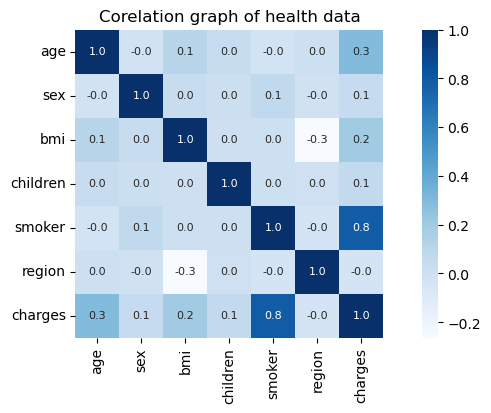

In [42]:
# getting corelations of the fileds of data with target variable and visualizing them
coorelation=health_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(coorelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.title('Corelation graph of health data')
plt.show()

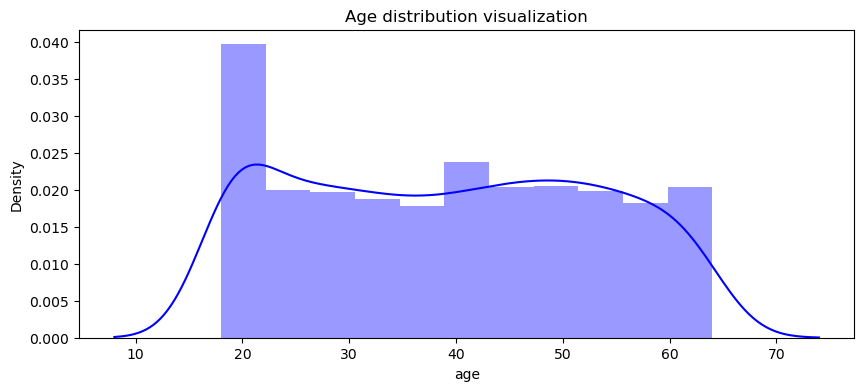

In [82]:
plt.figure(figsize=(10,4))
sns.distplot(health_data['age'],color='blue')
plt.title('Age distribution visualization')
plt.show()

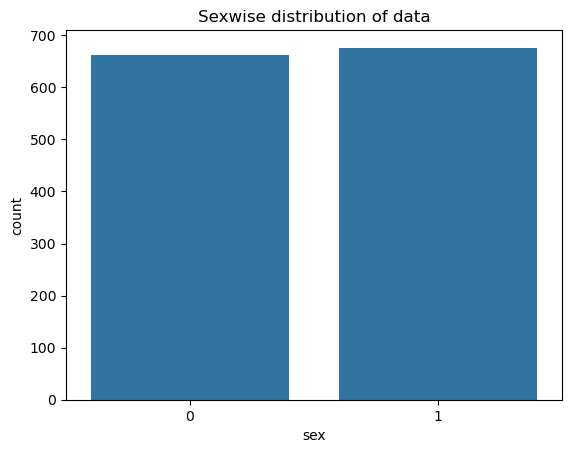

In [84]:
sns.countplot(x='sex',data=health_data[['sex']])
plt.title('Sexwise distribution of data')
plt.show()

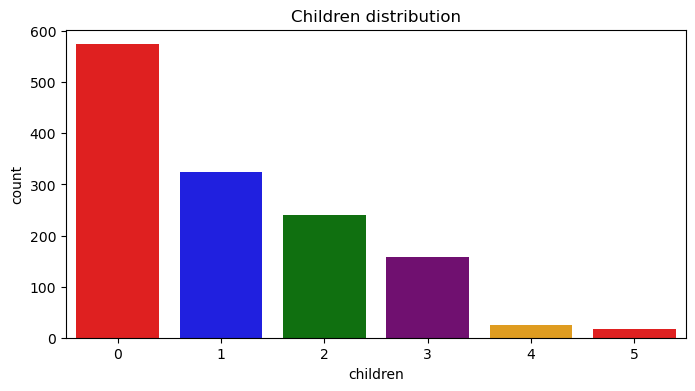

In [86]:
plt.figure(figsize=(8,4))
sns.countplot(data=health_data, x='children', palette=["red", "blue", "green", "purple", "orange"])
plt.title('Children distribution')
plt.show()

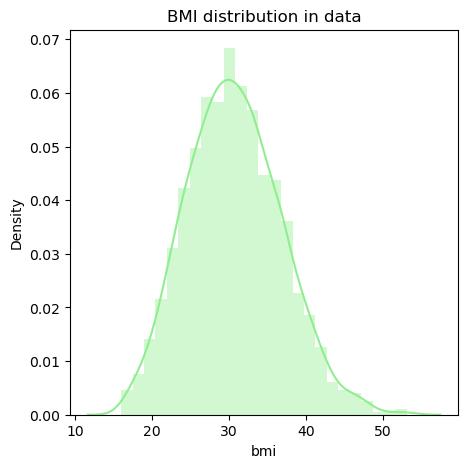

In [88]:
plt.figure(figsize=(5,5))
sns.distplot(health_data['bmi'],color='lightgreen')
plt.title('BMI distribution in data')
plt.show()

In [101]:
# splitting the data in x and y
x=health_data.drop(columns=('charges'))
y=health_data['charges']

In [97]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [103]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:
X_train.shape

(1070, 6)

In [109]:
X_test.shape

(268, 6)

In [111]:
Y_train.shape

(1070,)

In [113]:
Y_test.shape

(268,)

## linear regression model

In [115]:
# initializing the machine learning model and training the model on data
health_data_model=LinearRegression()

In [117]:
health_data_model.fit(X_train,Y_train)

LinearRegression()

In [119]:
#making the prediction from the model by showing the testing data
y_pred=health_data_model.predict(X_test)

In [125]:
# getting the model performance by checking its accuracy of prediction
model_accu=metrics.r2_score(Y_test,y_pred)
print('accuracy of the linear regression model is =',model_accu)

accuracy of the linear regression model is = 0.7454471618659975


## building random forest regressor

In [157]:
# building regreesion model using random forest regresor
from sklearn.ensemble import RandomForestRegressor

In [159]:
randomf_model=RandomForestRegressor()

In [161]:
randomf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [165]:
random_predict=randomf_model.predict(X_test)


In [169]:
randomf_accu=metrics.r2_score(Y_test,random_predict)
print('accuracy of random forest regressor is =',randomf_accu)

accuracy of random forest regressor is = 0.8340900259863894


In [147]:
health_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


## prediction model for testing

In [188]:
# building predictive systeam using linear regression
input_data=(46,0,33.44,1,0,0)
input_array=np.array(input_data)
input_reshape=input_array.reshape(1,-1)

In [190]:
prediction=health_data_model.predict(input_reshape)
prediction

array([10558.93772435])

In [192]:
# prediction systeam using random forest regression
prediction_random=randomf_model.predict(input_reshape)
prediction_random

array([8433.6556112])